# R Demonstration 1 - Advertising Data Set


Call:
lm(formula = sales ~ TV, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


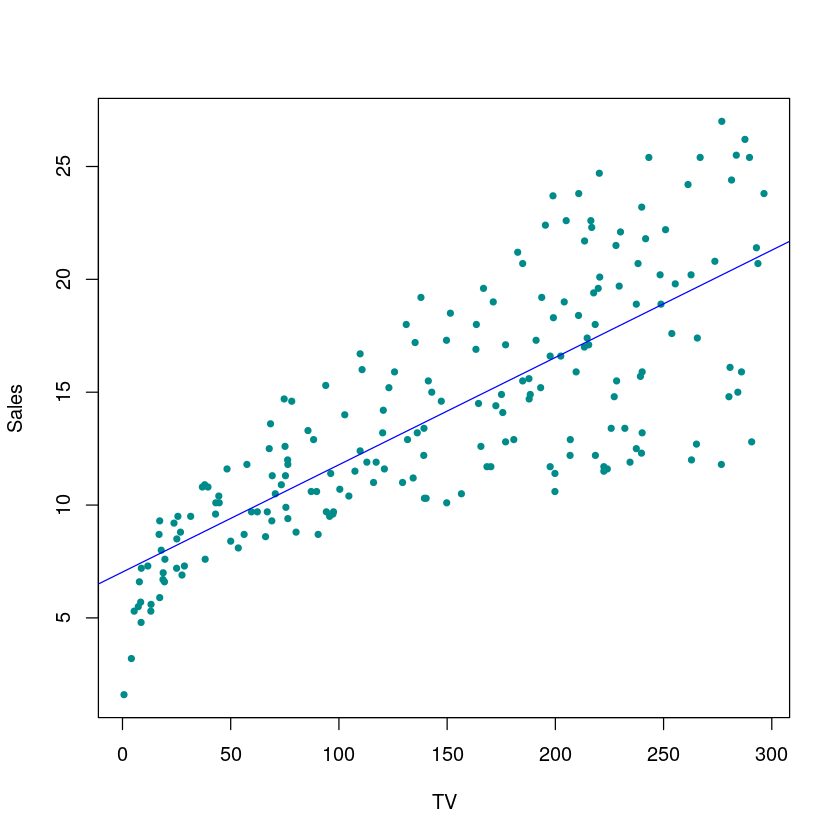

In [1]:
# Import Dataset in R Studio

Advertising <- read.csv(file="../../data/Advertising.csv")

lm.advertising <- lm(sales ~ TV, data = Advertising)


plot(sales ~ TV, col = "darkcyan", 
     xlab = "TV", ylab = "Sales", pch = 20, data = Advertising)

abline(lm(sales ~ TV, data = Advertising), col="blue")

summary(lm(sales ~ TV, data = Advertising))

# R Demonstration 2 - Simulation of Regression lines

We create 100 random values of `X`, and generate 100 corresponding values of `Y` from the model $Y=2+3X+\varepsilon$

In [ ]:
x <- runif(100, -2, 2)
x
rnorm(100,0,4)
y <- 2 + 3*x + rnorm(100,0,4)
plot(x,y)
abline(lm(y ~ x), col="blue")

We now run 3 simulations, each containing new simulated data according to the above procedure. The red line represents the plot of the function $f(x)=2 + 3X$, the *population regression line*. The blue line is the least squares line that was constructed by means of the least squares estimates for the simulated data.

In [ ]:
par(mfrow=c(1,3))
for (i in 1:3)
{
  x <- runif(100,-2,2)
  y <- 2+3*x+rnorm(100,0,4)
  plot(x,y,ylim=c(-10,10),xlim=c(-2,2),col="darkcyan")
  abline(c(2,3),col="red")
  abline(lm(y~x),col="blue")
  cat("regression coefficients" , coef(lm(y~x)))
}

# Exercise 4.5

We would like to simulate the distribution of the estimated coefficient values $\beta_0$ and $\beta_{1}$. Our model is $Y_i = 4 + 2x_i + \epsilon_{i}$ with the following $x_{i}$ values:

$$
0,  3,  4,  8,  10,  11,  13,  16,  17,  20
$$



The measurement errors $\epsilon_{i}$ are normally distributed with $\mu = 0$ and $\sigma^2 = 2$.

We simulate 10 values of $Y_i$ on the basis of the model $Y_i = 4 + 2x_i + \epsilon_i$ one hundred times and estimate the values of the regression coefficients $\beta_0$ and $\beta_1$.
		

In [ ]:
x_sim <- c(0,3,4,8,10,11,13,16,17,20)
error_sim <- matrix(rnorm(10*100, mean=0, sd=sqrt(2)), ncol=100)
head(error_sim)
dim(error_sim)
y_sim <- 4 + 2*x_sim + error_sim
head(y_sim)
coef <- matrix(0, ncol=2, nrow=100)
for(i in 1:100) coef[i,] <- coef(lm(y_sim[,i] ~ x_sim))
head(coef)    
error_sim2 <- matrix(rnorm(10*10000, mean=0, sd=sqrt(2)), ncol=10000)
y_sim2 <- 4 + 2*x_sim + error_sim2
coef2 <- matrix(0, ncol=2, nrow=10000)
##Attention, this may take a while!
for(i in 1:10000) coef2[i,] <- coef(lm(y_sim2[,i] ~ x_sim))

We have a look at the distribution of the estimated regression coefficients by means of a histogram and a normal plot. We have a look at the joint distribution of the regression coefficients by means of a scatter plot.

In [ ]:
par(mfrow=c(2,2))
hist(coef[,1], xlab=expression(beta[0]), col="blue")
hist(coef[,2], xlab=expression(beta[1]), col="yellow")
##
hist(coef2[,1], xlab=expression(beta[0]), 
col="blue")
hist(coef2[,2], xlab=expression(beta[1]), col="yellow")

In [ ]:
par(mfrow=c(2,1))
qqnorm(coef2[,1]);qqline(coef2[,1])
##
qqnorm(coef2[,2]);qqline(coef2[,2])

We have a look at the joint distribution of the regression coefficients by means of a scatter plot.

The following scatter plot shows the correlation between the estimated coefficients 
$\hat{\beta}_0$ and $\hat{\beta}_1$. 
On the left with $100$ simulated straight lines, on the right with $10000$.

In [ ]:
par(mfrow=c(1,2))
plot(coef[,1], coef[,2], xlab=expression(beta[0]), ylab=expression(beta[1]))
plot(coef2[,1], coef2[,2], xlab=expression(beta[0]), ylab=expression(beta[1]))

We determine the mean value of the 100 estimations of $\beta_0$ and $\beta_1$. We determine as well their variance.

In [ ]:
## beta_0
cat("arithmetic mean of beta_0 (100 simulations): ", mean(coef[,1]), "\n")
cat("standard deviation of beta_0 (100 simulations): ", sd(coef[,1]), "\n")
cat("variation of beta_0 (100 simulations): ", var(coef[,1]), "\n")
cat("arithmetic mean of beta_0 (10000 simulations): ", mean(coef2[,1]), "\n")
cat("standard deviation of beta_0 (10000 simulations): ", sd(coef2[,1]), "\n")
cat("variation of beta_0 (10000 simulations): ", var(coef2[,1]), "\n")
## beta_1
cat("arithmetic mean of beta_1 (100 simulations): ", mean(coef[,2]), "\n")
cat("standard deviation of beta_1 (100 simulations): ", sd(coef[,2]), "\n")
cat("variation of beta_1 (100 simulations): ", var(coef[,2]), "\n")
cat("arithmetic mean of beta_1 (10000 simulations): ", mean(coef2[,2]), "\n")
cat("standard deviation of beta_1 (10000 simulations): ", sd(coef2[,2]), "\n")
cat("variation of beta_1 (10000 simulations): ", var(coef2[,2]), "\n")

In [ ]:
## se(beta_0) :
SSx <- sum((x_sim-mean(x_sim))^2)

sqrt(2 * (1/10 + mean(x_sim)^2/SSx))

## se(beta_1) : 

sqrt(2/SSx)

Here I write some A

The theoretical estimates $\widehat{\text{se}(\hat{\beta}_0)}=0.862$ and $\widehat{\text{se}(\hat{\beta}_1)}=0.0722$ that we 
computed above (and that we obtain as well on the basis of the 
$R$-output) measure the average deviation of the parameter estimates $\hat{\beta}_0$ and 
$\hat{\beta}_1$ around the true parameter values $\beta_0$ and $\beta_1$.  

The more simulations we run, the closer the emprirical standard deviations of the set of estimates $\hat{\beta}_0$ and 
$\hat{\beta}_1$ get to the \emph{true} standard deviations 
se$(\hat{\beta}_0 )$ and se$(\hat{\beta}_1)$. On the basis of 10000 simulations 
we find se$(\hat{\beta}_0 ) \approx 0.8616496$ and se$(\hat{\beta}_1) \approx  0.0721$. We conclude that the theoretical 
estimates of se$(\hat{\beta}_0 )$ and se$(\hat{\beta}_1)$ and the (approximately) true values of se$(\hat{\beta}_0 )$ and se$(\hat{\beta}_1)$
agree to a high degree.